In [ ]:
import pandas as pd

file_path = 'AIB_History_Training_2014-2020.xlsx'
data = pd.read_excel(file_path)

data.head()


,FileFolder,FileName,Report_Title,Report_RunDate,Report_AsOfDate,Report_TransactionEffectiveDate,Currency,Institution,Branch,TransactionGroup,TransactionCode,TransactionBackdateFlag,TransactionAmount
0,Generic Random Data,AIBC0101.001,AIBC 0809TTTBB,2014-01-01,2013-12-31,2013-12-30,CAD,1,1,D,CP,Yes,-972.619715
1,Generic Random Data,AIBC0101.001,AIBC 0809TTTBB,2014-01-01,2013-12-31,2013-12-30,CAD,1,1,D,UR,Yes,-75.956876
2,Generic Random Data,AIBC0101.001,AIBC 0809TTTBB,2014-01-01,2013-12-31,2013-12-30,CAD,1,1,C,CP,Yes,127.430470
3,Generic Random Data,AIBC0101.001,AIBC 0809TTTBB,2014-01-01,2013-12-31,2013-12-30,CAD,1,1,D,UR,Yes,-38.300469
4,Generic Random Data,AIBC0101.001,AIBC 0809TTTBB,2014-01-01,2013-12-31,2013-12-30,CAD,1,1,D,UR,Yes,-117.467137


In [ ]:
pip install pandas numpy matplotlib pmdarima statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [ ]:

train_data = data[data['Report_TransactionEffectiveDate'] < '2020-01-01']
test_data = data[data['Report_TransactionEffectiveDate'] >= '2020-01-01']

print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')


Train data shape: (57616, 13)
Test data shape: (10115, 13)


In [ ]:
data['Report_TransactionEffectiveDate'] = pd.to_datetime(data['Report_TransactionEffectiveDate'])
daily_totals = data.groupby('Report_TransactionEffectiveDate')['TransactionAmount'].sum()

time_series = daily_totals.asfreq('D', fill_value=0)  # Ensure daily frequency

time_series.head()


Report_TransactionEffectiveDate
2013-12-30    -1076.913729
2013-12-31   -41733.273687
2014-01-01    -3465.890925
2014-01-02   -45506.653405
2014-01-03   -18386.381900
Freq: D, Name: TransactionAmount, dtype: float64

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

train_data = time_series['2014-01-01':'2020-12-31']

model = ARIMA(train_data, order=(1, 1, 1))
fitted_model = model.fit()

fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      TransactionAmount   No. Observations:                 2557
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -29115.213
Date:                Thu, 01 Feb 2024   AIC                          58236.427
Time:                        22:41:55   BIC                          58253.965
Sample:                    01-01-2014   HQIC                         58242.787
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0397      0.027     -1.451      0.147      -0.093       0.014
ma.L1         -0.9876      0.004   -247.838      0.000      -0.995      -0.980
sigma2      5.694e+08   1.34e-11   4.25e+19      0.000    5.69e+08    5.69e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               914.81
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.1e+34. Standard errors may be unstable.
"""

In [ ]:
prediction_dates = pd.date_range(start='2021-01-01', end='2021-03-31', freq='D')
predictions = fitted_model.predict(start=prediction_dates[0], end=prediction_dates[-1])

predictions_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_TransactionAmount': predictions})

predictions_csv_path = '/content/aibpredictions.csv'
predictions_df.to_csv(predictions_csv_path, index=False)

predictions_csv_path, predictions_df.head()


('/content/aibpredictions.csv',
                  Date  Predicted_TransactionAmount
 2021-01-01 2021-01-01                 14988.876197
 2021-01-02 2021-01-02                 20466.683345
 2021-01-03 2021-01-03                 20249.142069
 2021-01-04 2021-01-04                 20257.781331
 2021-01-05 2021-01-05                 20257.438238)

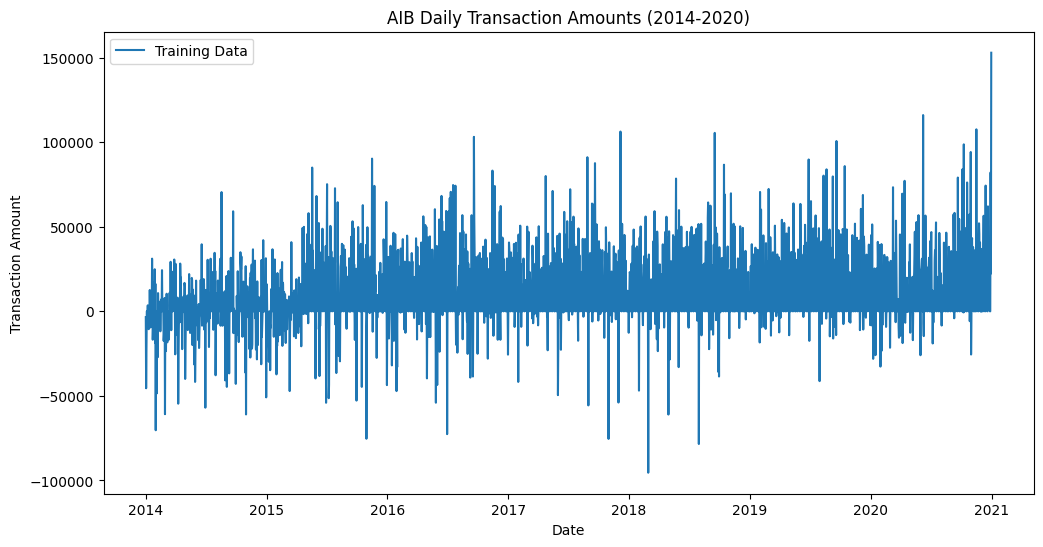

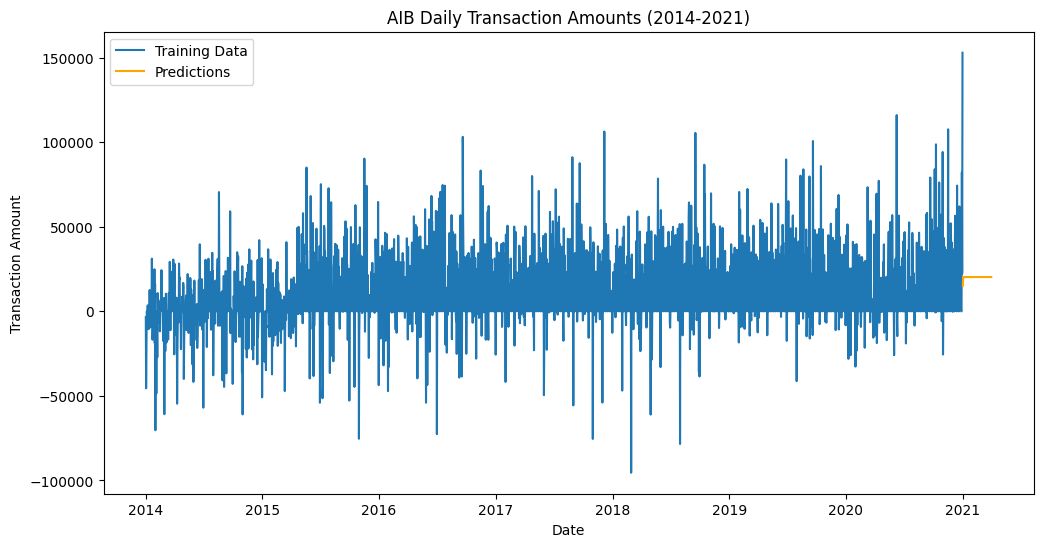

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.title('AIB Daily Transaction Amounts (2014-2020)')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(prediction_dates, predictions, color='orange', label='Predictions')
plt.title('AIB Daily Transaction Amounts (2014-2021)')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()


Train data shape: (57616, 13)
Test data shape: (10115, 13)


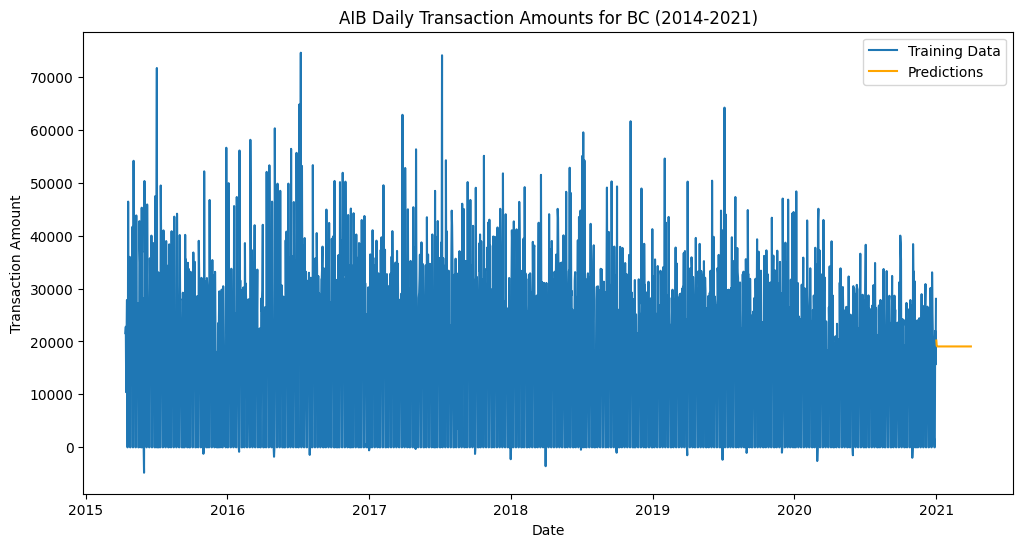

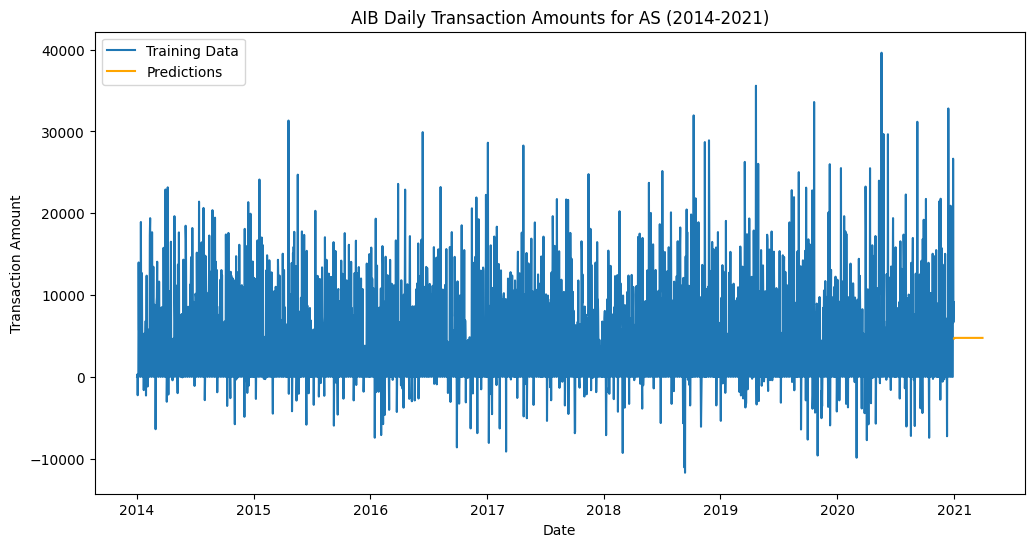

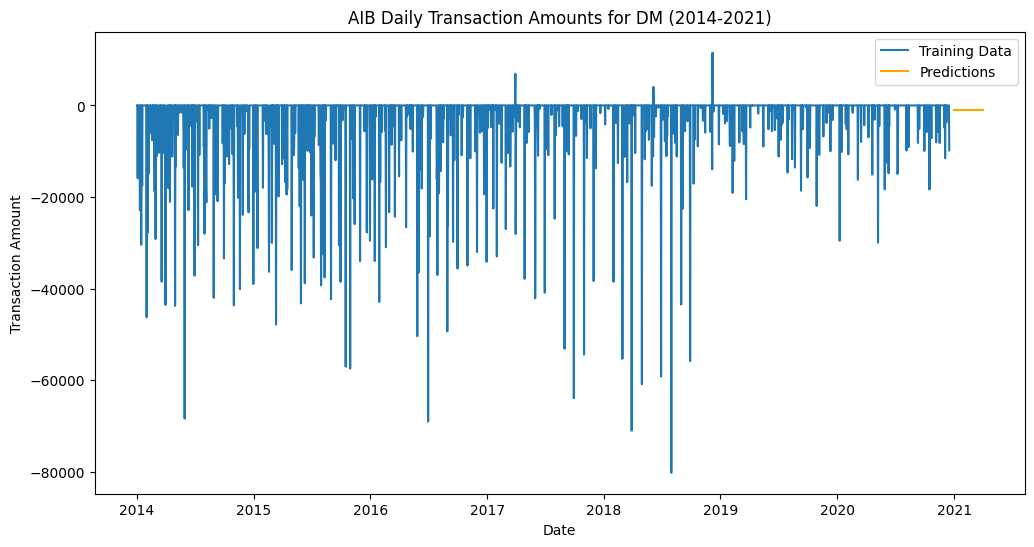

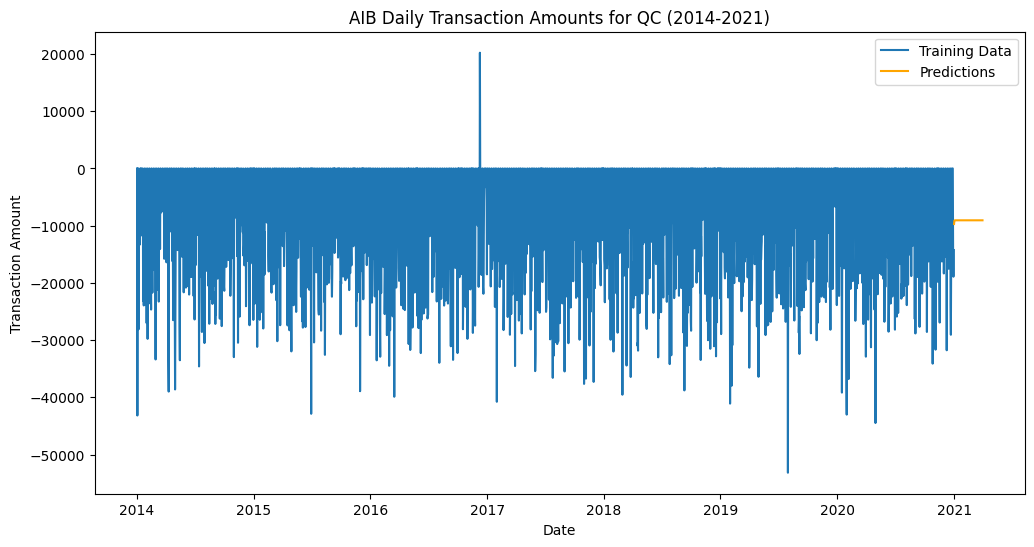

In [ ]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
import matplotlib.pyplot as plt

file_path = 'AIB_History_Training_2014-2020.xlsx'
data = pd.read_excel(file_path)

data.head()

train_data = data[data['Report_TransactionEffectiveDate'] < '2020-01-01']
test_data = data[data['Report_TransactionEffectiveDate'] >= '2020-01-01']

print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

data['Report_TransactionEffectiveDate'] = pd.to_datetime(data['Report_TransactionEffectiveDate'])

transaction_codes = ['BC', 'AS', 'DM', 'QC']

for code in transaction_codes:
  daily_totals = data[data['TransactionCode'] == code].groupby('Report_TransactionEffectiveDate')['TransactionAmount'].sum()
  time_series = daily_totals.asfreq('D', fill_value=0)

  warnings.filterwarnings("ignore")

  train_data = time_series['2014-01-01':'2020-12-31']

  model = ARIMA(train_data, order=(1, 1, 1))
  fitted_model = model.fit()

  prediction_dates = pd.date_range(start='2021-01-01', end='2021-03-31', freq='D')
  predictions = fitted_model.predict(start=prediction_dates[0], end=prediction_dates[-1])

  predictions_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_TransactionAmount': predictions})

  predictions_csv_path = f'/content/aibpredictions_{code}.csv'
  predictions_df.to_csv(predictions_csv_path, index=False)

  plt.figure(figsize=(12, 6))
  plt.plot(train_data, label='Training Data')
  plt.plot(prediction_dates, predictions, color='orange', label='Predictions')
  plt.title(f'AIB Daily Transaction Amounts for {code} (2014-2021)')
  plt.xlabel('Date')
  plt.ylabel('Transaction Amount')
  plt.legend()
  plt.show()


Train data shape: (57616, 13)
Test data shape: (10115, 13)


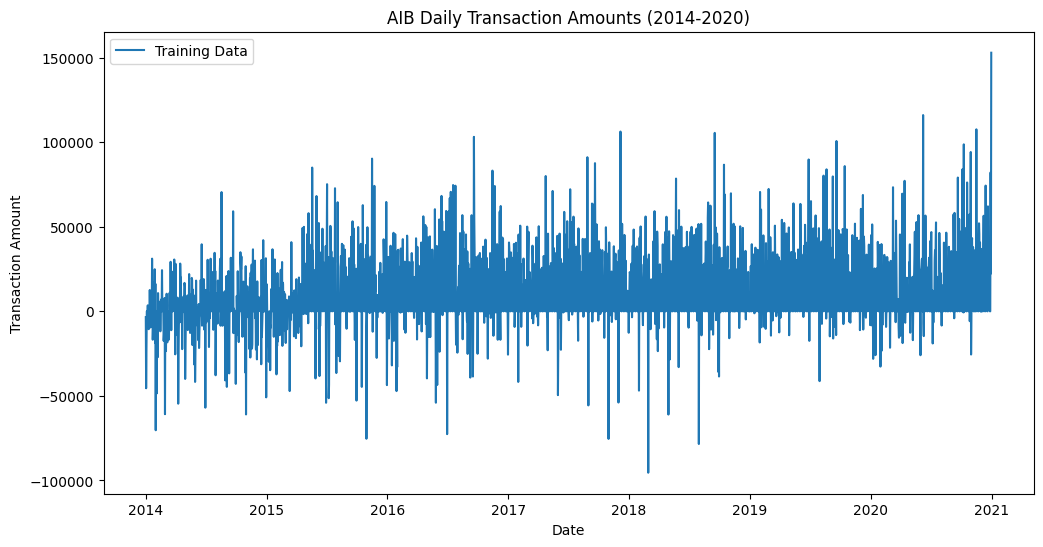

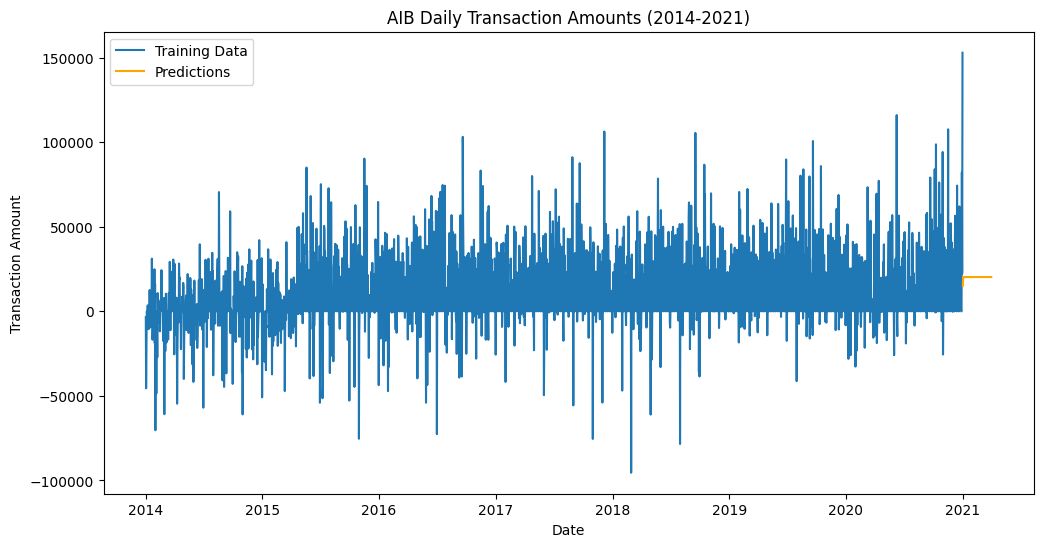

Train data shape: (57616, 13)
Test data shape: (10115, 13)


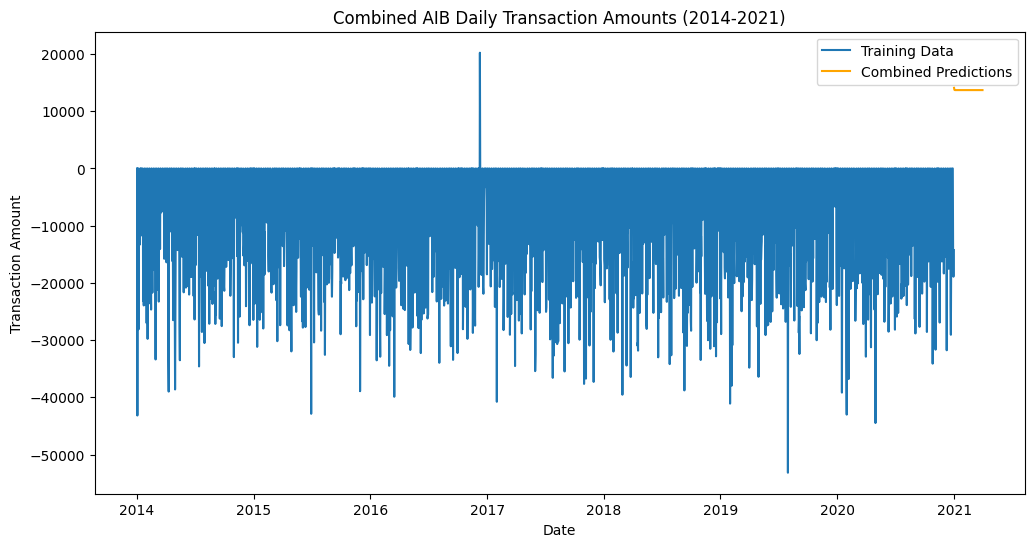

In [ ]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
import matplotlib.pyplot as plt

file_path = 'AIB_History_Training_2014-2020.xlsx'
data = pd.read_excel(file_path)

data.head()



train_data = data[data['Report_TransactionEffectiveDate'] < '2020-01-01']
test_data = data[data['Report_TransactionEffectiveDate'] >= '2020-01-01']

print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

data['Report_TransactionEffectiveDate'] = pd.to_datetime(data['Report_TransactionEffectiveDate'])
daily_totals = data.groupby('Report_TransactionEffectiveDate')['TransactionAmount'].sum()

time_series = daily_totals.asfreq('D', fill_value=0)  # Ensure daily frequency

time_series.head()


warnings.filterwarnings("ignore")

train_data = time_series['2014-01-01':'2020-12-31']

model = ARIMA(train_data, order=(1, 1, 1))
fitted_model = model.fit()

fitted_model.summary()

prediction_dates = pd.date_range(start='2021-01-01', end='2021-03-31', freq='D')
predictions = fitted_model.predict(start=prediction_dates[0], end=prediction_dates[-1])

predictions_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_TransactionAmount': predictions})

predictions_csv_path = '/content/aibpredictions.csv'
predictions_df.to_csv(predictions_csv_path, index=False)

predictions_csv_path, predictions_df.head()


plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.title('AIB Daily Transaction Amounts (2014-2020)')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(prediction_dates, predictions, color='orange', label='Predictions')
plt.title('AIB Daily Transaction Amounts (2014-2021)')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()



file_path = 'AIB_History_Training_2014-2020.xlsx'
data = pd.read_excel(file_path)

data.head()

train_data = data[data['Report_TransactionEffectiveDate'] < '2020-01-01']
test_data = data[data['Report_TransactionEffectiveDate'] >= '2020-01-01']

print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

data['Report_TransactionEffectiveDate'] = pd.to_datetime(data['Report_TransactionEffectiveDate'])

transaction_codes = ['BC', 'AS', 'DM', 'QC']

predictions_dfs = []

for code in transaction_codes:
  daily_totals = data[data['TransactionCode'] == code].groupby('Report_TransactionEffectiveDate')['TransactionAmount'].sum()
  time_series = daily_totals.asfreq('D', fill_value=0)

  warnings.filterwarnings("ignore")

  train_data = time_series['2014-01-01':'2020-12-31']

  model = ARIMA(train_data, order=(1, 1, 1))
  fitted_model = model.fit()

  prediction_dates = pd.date_range(start='2021-01-01', end='2021-03-31', freq='D')
  predictions = fitted_model.predict(start=prediction_dates[0], end=prediction_dates[-1])

  predictions_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_TransactionAmount': predictions})

  predictions_dfs.append(predictions_df)

# Combine all predictions into a single DataFrame
combined_predictions_df = pd.concat(predictions_dfs)

# Group by date and sum the predicted transaction amounts
combined_predictions_df = combined_predictions_df.groupby('Date')['Predicted_TransactionAmount'].sum()

combined_predictions_df.head()

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(combined_predictions_df, color='orange', label='Combined Predictions')
plt.title('Combined AIB Daily Transaction Amounts (2014-2021)')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()


In [ ]:

combined_predictions_df.to_csv('/content/combined_aibpredictions_q1_2021.csv', index=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(train_data, fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])))

print("RMSE:", rmse)


RMSE: 9489.653200822351
